In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv("B:\Data-Project-1\Thyroid_Diff.csv")

In [94]:
df

,Age,Gender,Smoking,Smoke_hist,Radiotherapy_hist,Status,Physical Examination,Adenopathy,Type,Focality,Risk,Tumor_class,Nodal_class,Metastatis_class,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


## Data fram info}

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [47]:
df = df.rename(columns = {'Hx Smoking':'Smoke_hist',
                     'Hx Radiothreapy':'Radiotherapy_hist',
                     'Thyroid Function':'Status',
                     'Pathology':'Type',
                     'T':'Tumor_class',
                     'N':'Nodal_class',
                     'M':'Metastatis_class'})

- Age: The age of the patient at the time of diagnosis or treatment.
- Gender: The gender of the patient (male or female).
- Smoking: Whether the patient is a smoker or not.
- Hx Smoking: Smoking history of the patient (e.g., whether they have ever smoked).
- Hx Radiotherapy: History of radiotherapy treatment for any condition.
- Thyroid Function: The status of thyroid function, possibly indicating if there are any abnormalities.
- Physical Examination: Findings from a physical examination of the patient, which may include palpation of the thyroid gland and surrounding structures.
- Adenopathy: Presence or absence of enlarged lymph nodes (adenopathy) in the neck region.
- Pathology: Specific types of thyroid cancer as determined by pathology examination of biopsy samples.
- Focality: Whether the cancer is unifocal (limited to one location) or multifocal (present in multiple locations).
- Risk: The risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type.
- T: Tumor classification based on its size and extent of invasion into nearby structures.
- N: Nodal classification indicating the involvement of lymph nodes.
- M: Metastasis classification indicating the presence or absence of distant metastases.
- Stage: The overall stage of the cancer, typically determined by combining T, N, and M classifications.
- Response: Response to treatment, indicating whether the cancer responded positively, negatively, or remained stable after treatment.
- Recurred: Indicates whether the cancer has recurred after initial treatment

Note there is no missing values so no changes have to be made here. 

In [48]:
unique_val = [df[n].unique() for n in df.columns]
columns = df.columns
for i in range(len(unique_val)):
    print(f'Unique values for {columns[i]}: {unique_val[i]}')

Unique values for Age: [27 34 30 62 52 41 46 51 40 75 59 49 50 76 42 44 43 36 70 60 33 26 37 55
 31 45 20 38 29 25 21 23 24 35 54 22 69 28 17 73 18 39 57 66 32 47 56 63
 19 67 72 61 68 48 81 53 58 80 79 65 15 82 71 64 78]
Unique values for Gender: ['F' 'M']
Unique values for Smoking: ['No' 'Yes']
Unique values for Smoke_hist: ['No' 'Yes']
Unique values for Radiotherapy_hist: ['No' 'Yes']
Unique values for Status: ['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']
Unique values for Physical Examination: ['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
Unique values for Adenopathy: ['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
Unique values for Type: ['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']
Unique values for Focality: ['Uni-Focal' 'Multi-Focal']
Unique values for Risk: ['Low' 'Intermediate' 'High']
Unique values for Tumor_c

From this:
- Age: scale it.
- Gender-Focalty: one hot.
- Risk, Tumur, Nodal, Metastatis and Stage - origanal encode. Risk is with low being the weakest class and high being the strongest class. For Tumor class the lower the number the smaller the tumor as  well as this (a) is weaker than (b) for the same number [1]. For Nodal class N0 means cancer has not spread to lymph nodes, N1a means cancer has spread to lymph nodes near thyroid and N1b means cancer has spread to lymph nodes outside the thyroid and this is the strongest class. Metastatis tells you if it has spread to another part of the body, M0 means it hasnt and M1 means it has.
- Rest is one hot


## Data insights

In [93]:
print(df[['Gender', 'Recurred']].value_counts(sort = False))
df['Gender'].value_counts()

Gender  Recurred
F       No          246
        Yes          66
M       No           29
        Yes          42
Name: count, dtype: int64


Gender
F    312
M     71
Name: count, dtype: int64

Percentage Recurrance with respect to gender:
                  Percentage
Gender Recurred            
F      No          0.788462
       Yes         0.211538
M      No          0.408451
       Yes         0.591549


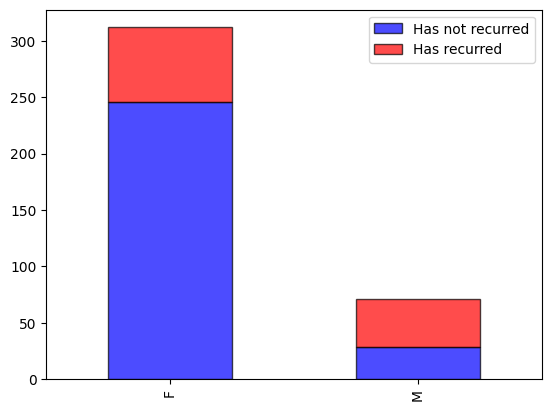

In [158]:
def percentage_gender_recurr_bar():
    recurr_per_gender = df[['Gender', 'Recurred']].value_counts(sort = False)
    gender_recur_plot = pd.DataFrame({
        'Has not recurred':[recurr_per_gender.iloc[0], recurr_per_gender.iloc[2]],
        'Has recurred':[recurr_per_gender.iloc[1], recurr_per_gender.iloc[3]]
    }, 
    index=['F', 'M'])

    gender_recur_plot.plot(kind='bar', stacked=True, color=['blue', 'red'], alpha = 0.7, edgecolor = 'black')
    
    percentages = pd.DataFrame(df[['Gender', 'Recurred']].value_counts(sort = False)/df['Gender'].value_counts(sort = False))
    percentages = percentages.rename(columns={'count':'Percentage'})

    print(f'Percentage Recurrance with respect to gender:\n {percentages}')

percentage_gender_recurr_bar()

Insights from this:
- Many more females were observed than males so statified sampling can be used when splitting for test and train data
- Seeems like its more likely for the cancer to come back if your a male than if your a female by a decent proportion, however there is uncertainty as not many males used for this test. (Percentage males that have had recurred cancer is 59% but for females this is 21%)


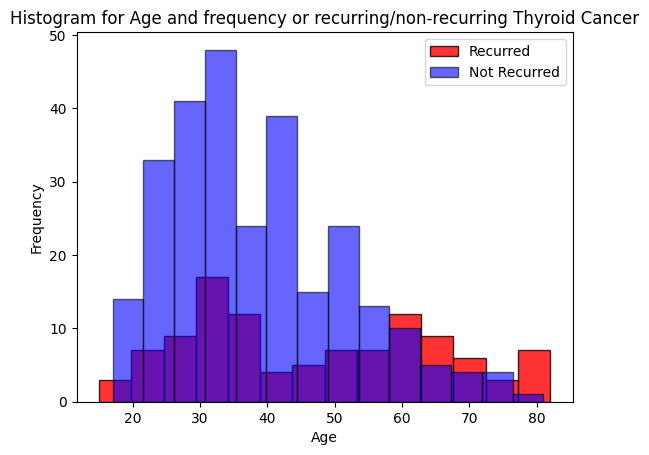

In [154]:

age_rec_df = df[["Age", "Recurred"]]
age_recurred = age_rec_df[age_rec_df["Recurred"]=='Yes']['Age']
age_not_recurred = age_rec_df[age_rec_df["Recurred"]=='No']['Age']
plt.hist(age_recurred, color = 'Red', bins = 14, alpha = 0.8, label = 'Recurred', edgecolor = 'black')
plt.hist(age_not_recurred, color = 'Blue', bins = 14,alpha = 0.6, label = 'Not Recurred', edgecolor='black')
plt.title("Histogram for Age and frequency or recurring/non-recurring Thyroid Cancer")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

In [40]:
df.shape

(383, 17)

<Axes: title={'center': 'Stacked Bar Graph'}, ylabel='Recurred'>

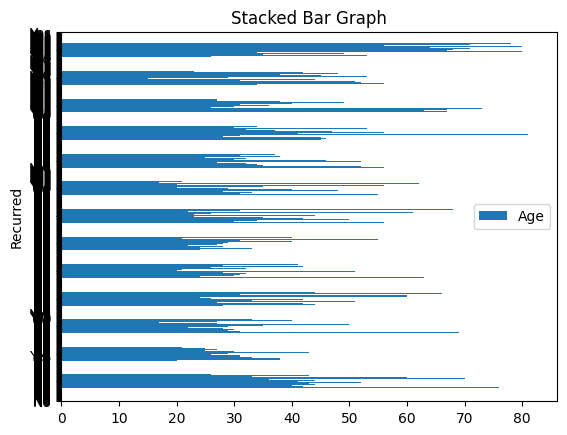